## 灰色关联分析法

对于两个系统之间的因素，其随时间或不同对象而变化的关联性大小的量度，称为关联度。在系统发展过程中，若两个因素变化的趋势具有一致性，即同步变化程度较高，即可谓二者关联程度较高；反之，则较低。因此，灰色关联分析方法，是根据因素之间发展趋势的相似或相异程度，亦即“灰色关联度”，作为衡量因素间关联程度的一种方法。

### 简介
灰色系统理论提出了对各子系统进行灰色关联度分析的概念，意图透过一定的方法，去寻求系统中各子系统（或因素）之间的数值关系。因此，灰色关联度分析对于一个系统发展变化态势提供了量化的度量，非常适合动态历程分析。
###  计算步骤
1. 确实参考数列与比较数列
2. 对参考数列与比较数列进行无量纲化处理
3. 计算关联系数,求关联度

此处我给出的是第三步的实现方式,无量纲化请自己处理.

In [4]:
import pandas as pd
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline

# 从硬盘读取数据进入内存
wine = pd.read_csv("/home/fonttian/Data/dataset/wine/wine.csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
# 无量纲化
def dimensionlessProcessing(df):
    newDataFrame = pd.DataFrame(index=df.index)
    columns = df.columns.tolist()
    for c in columns:
        d = df[c]
        MAX = d.max()
        MIN = d.min()
        MEAN = d.mean()
        newDataFrame[c] = ((d - MEAN) / (MAX - MIN)).tolist()
    return newDataFrame

def GRA_ONE(gray, m=0):
    # 读取为df格式
    gray = dimensionlessProcessing(gray)
    # 标准化
    std = gray.iloc[:, m]  # 为标准要素
    gray.drop(str(m),axis=1,inplace=True)
    ce = gray.iloc[:, 0:]  # 为比较要素
    shape_n, shape_m = ce.shape[0], ce.shape[1]  # 计算行列

    # 与标准要素比较，相减
    a = zeros([shape_m, shape_n])
    for i in range(shape_m):
        for j in range(shape_n):
            a[i, j] = abs(ce.iloc[j, i] - std[j])

    # 取出矩阵中最大值与最小值
    c, d = amax(a), amin(a)

    # 计算值
    result = zeros([shape_m, shape_n])
    for i in range(shape_m):
        for j in range(shape_n):
            result[i, j] = (d + 0.5 * c) / (a[i, j] + 0.5 * c)

    # 求均值，得到灰色关联值,并返回
    result_list = [mean(result[i, :]) for i in range(shape_m)]
    result_list.insert(m,1)
    return pd.DataFrame(result_list)


def GRA(DataFrame):
    df = DataFrame.copy()
    list_columns = [
        str(s) for s in range(len(df.columns)) if s not in [None]
    ]
    df_local = pd.DataFrame(columns=list_columns)
    df.columns=list_columns
    for i in range(len(df.columns)):
        df_local.iloc[:, i] = GRA_ONE(df, m=i)[0]
    return df_local

In [6]:
data_wine_gra = GRA(wine)
# data_wine_gra.to_csv(path+"GRA.csv") 存储结果到硬盘
data_wine_gra

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.000000,0.797338,0.848606,0.834680,0.856485,0.771742,0.804445,0.866226,0.792534,0.848224,0.781405,0.811607
1,0.765914,1.000000,0.729001,0.843650,0.873004,0.799388,0.834556,0.815033,0.858440,0.834594,0.772151,0.789429
2,0.830478,0.739233,1.000000,0.783976,0.812729,0.744378,0.768540,0.801981,0.765208,0.818265,0.770479,0.796946
3,0.824941,0.858308,0.794522,1.000000,0.930368,0.828444,0.869884,0.856226,0.861760,0.891200,0.815316,0.822204
4,0.824783,0.866911,0.795920,0.919391,1.000000,0.823352,0.867915,0.854191,0.867162,0.902720,0.804344,0.817785
5,0.770539,0.826189,0.767345,0.837225,0.854510,1.000000,0.886327,0.802133,0.837886,0.843206,0.782054,0.802625
6,0.790781,0.847764,0.776790,0.868068,0.884358,0.878042,1.000000,0.826921,0.846780,0.862525,0.780485,0.801496
7,0.855700,0.829385,0.809256,0.854202,0.872112,0.789406,0.826909,1.000000,0.820644,0.852416,0.753410,0.792117
8,0.751682,0.851797,0.746136,0.840533,0.867179,0.804148,0.826122,0.797579,1.000000,0.848358,0.810517,0.814287
9,0.822510,0.834044,0.809752,0.879408,0.907036,0.817837,0.849960,0.839089,0.854542,1.000000,0.821436,0.844837


In [5]:
data_wine_gra.columns = wine.columns
data_wine_gra.index = wine.columns
data_wine_gra

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.797338,0.848606,0.834680,0.856485,0.771742,0.804445,0.866226,0.792534,0.848224,0.781405,0.811607
volatile acidity,0.765914,1.000000,0.729001,0.843650,0.873004,0.799388,0.834556,0.815033,0.858440,0.834594,0.772151,0.789429
citric acid,0.830478,0.739233,1.000000,0.783976,0.812729,0.744378,0.768540,0.801981,0.765208,0.818265,0.770479,0.796946
residual sugar,0.824941,0.858308,0.794522,1.000000,0.930368,0.828444,0.869884,0.856226,0.861760,0.891200,0.815316,0.822204
chlorides,0.824783,0.866911,0.795920,0.919391,1.000000,0.823352,0.867915,0.854191,0.867162,0.902720,0.804344,0.817785
free sulfur dioxide,0.770539,0.826189,0.767345,0.837225,0.854510,1.000000,0.886327,0.802133,0.837886,0.843206,0.782054,0.802625
total sulfur dioxide,0.790781,0.847764,0.776790,0.868068,0.884358,0.878042,1.000000,0.826921,0.846780,0.862525,0.780485,0.801496
density,0.855700,0.829385,0.809256,0.854202,0.872112,0.789406,0.826909,1.000000,0.820644,0.852416,0.753410,0.792117
pH,0.751682,0.851797,0.746136,0.840533,0.867179,0.804148,0.826122,0.797579,1.000000,0.848358,0.810517,0.814287
sulphates,0.822510,0.834044,0.809752,0.879408,0.907036,0.817837,0.849960,0.839089,0.854542,1.000000,0.821436,0.844837


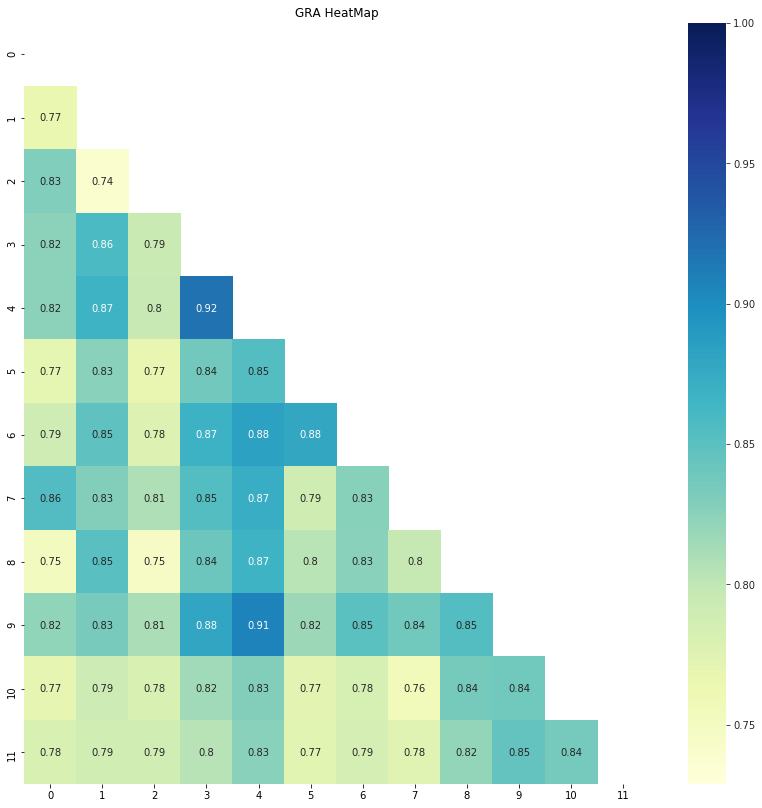

In [7]:
# 灰色关联结果矩阵可视化
import seaborn as sns

def ShowGRAHeatMap(DataFrame):
    colormap = plt.cm.RdBu
    ylabels = DataFrame.columns.values.tolist()
    f, ax = plt.subplots(figsize=(14, 14))
    ax.set_title('GRA HeatMap')
    
    # 设置展示一半，如果不需要注释掉mask即可
    mask = np.zeros_like(DataFrame)
    mask[np.triu_indices_from(mask)] = True
    
    with sns.axes_style("white"):
        sns.heatmap(DataFrame,
                    cmap="YlGnBu",
                    annot=True,
                    mask=mask,
                   )
    plt.show()

ShowGRAHeatMap(data_wine_gra)

In [141]:
import pandas as pd
# x=pd.read_excel('data.xlsx')
# x=x.iloc[:,1:].T

x = wine.T
import time
t1= time.time()
# 1、数据均值化处理
x_mean=x.mean(axis=1)
for i in range(x.index.size):
    x.iloc[i,:] = x.iloc[i,:]/x_mean[i]

# 2、提取参考队列和比较队列
ck=x.iloc[0,:]
cp=x.iloc[1:,:]

# 比较队列与参考队列相减
t=pd.DataFrame()
for j in range(cp.index.size):
    temp=pd.Series(cp.iloc[j,:]-ck)
    t=t.append(temp,ignore_index=True)

#求最大差和最小差
mmax=t.abs().max().max()
mmin=t.abs().min().min()
rho=0.5
#3、求关联系数
ksi=((mmin+rho*mmax)/(abs(t)+rho*mmax))


#4、求关联度
r=ksi.sum(axis=1)/ksi.columns.size
t2= time.time()
print(t2-t1)
#5、关联度排序，得到结果r3>r2>r1
result=r.sort_values(ascending=False)

0.5984435081481934


In [93]:
r,mmax,mmin

(0     0.899110
 1     0.864843
 2     0.918599
 3     0.929425
 4     0.853435
 5     0.850764
 6     0.950577
 7     0.943061
 8     0.936841
 9     0.945681
 10    0.944877
 dtype: float64, 6.060007162917876, 3.460713527747572e-05)

## 参考文章
1. [百度百科 灰色关联分析法](https://baike.baidu.com/item/%E7%81%B0%E8%89%B2%E5%85%B3%E8%81%94%E5%88%86%E6%9E%90%E6%B3%95/8602076?fr=aladdin)
2. [简书 Python实现灰色关联](https://www.jianshu.com/p/7f9325551348)